In [18]:
import os
import numpy as np

from PIL import Image               
from IPython.display import display 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

In [2]:
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
test_path = 'data/test_image'

### Load pre-trained models

In [21]:
model = load_model(model_path)

In [22]:
model.load_weights(model_weights_path)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_5 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 37, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 88800)             0         
__________

### Define image parameters

In [24]:
img_width, img_height = 150, 150

### Prediction function

In [25]:
def predict(file):
    x = load_img(file, target_size=(img_width, img_height))
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    result = array[0]
    
    answer = np.argmax(result)
    if answer == 0:
        print("Predicted: mobil")
    elif answer == 1:
        print("Predicted: motor")
        
    return answer

### Walk the directory for every image

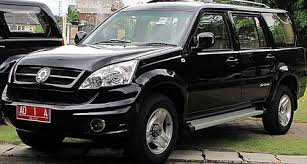

Predicted: mobil


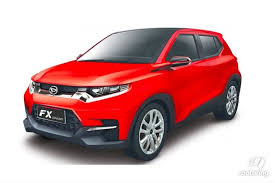

Predicted: mobil


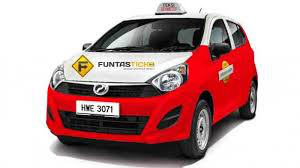

Predicted: mobil


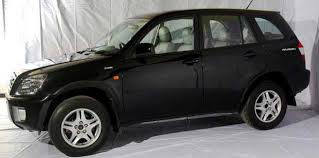

Predicted: motor


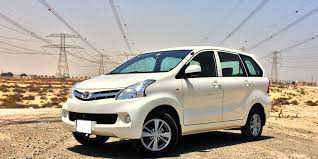

Predicted: mobil


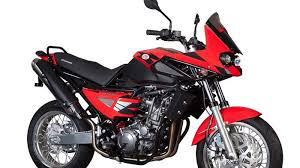

Predicted: motor


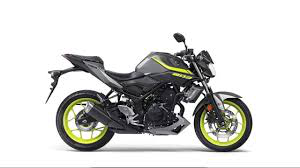

Predicted: motor


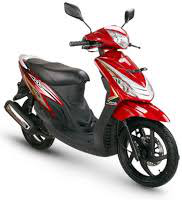

Predicted: motor


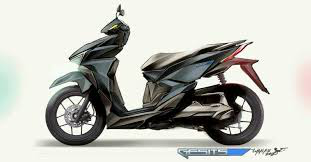

Predicted: motor


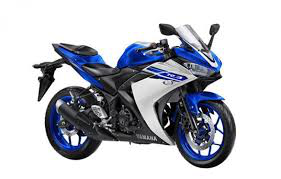

Predicted: motor


In [26]:
for i, ret in enumerate(os.walk(test_path)):
    for i, filename in enumerate(ret[2]):
        if filename.startswith("."):
            continue
        
#         print(ret[0] + '/' + filename)
        pil_im = Image.open(ret[0] +'/'+ filename)
        display(pil_im)
        result = predict(ret[0] +'/'+ filename)